# 1. Importación de Librerías y Carga de Datos
Usa pandas para cargar los datasets. (hacemos los respectivos pip install de cada librería.

In [34]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.impute import SimpleImputer  # Importar SimpleImputer
import re

# Cargar el dataset
df = pd.read_csv('car details v4.csv')

# Visualizar las primeras filas del dataset
print(df.head())


            Make                            Model    Price  Year  Kilometer  \
0          Honda              Amaze 1.2 VX i-VTEC   505000  2017      87150   
1  Maruti Suzuki                  Swift DZire VDI   450000  2014      75000   
2        Hyundai             i10 Magna 1.2 Kappa2   220000  2011      67000   
3         Toyota                         Glanza G   799000  2019      37500   
4         Toyota  Innova 2.4 VX 7 STR [2016-2020]  1950000  2018      69000   

  Fuel Type Transmission   Location   Color   Owner Seller Type   Engine  \
0    Petrol       Manual       Pune    Grey   First   Corporate  1198 cc   
1    Diesel       Manual   Ludhiana   White  Second  Individual  1248 cc   
2    Petrol       Manual    Lucknow  Maroon   First  Individual  1197 cc   
3    Petrol       Manual  Mangalore     Red   First  Individual  1197 cc   
4    Diesel       Manual     Mumbai    Grey   First  Individual  2393 cc   

            Max Power              Max Torque Drivetrain  Length   W

# 2. Análisis Exploratorio de Datos (EDA)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width 

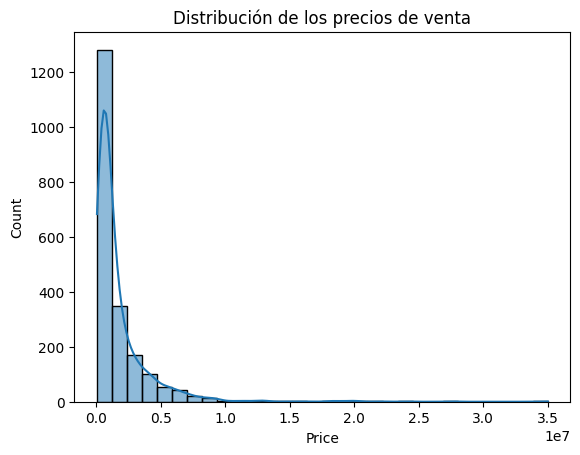

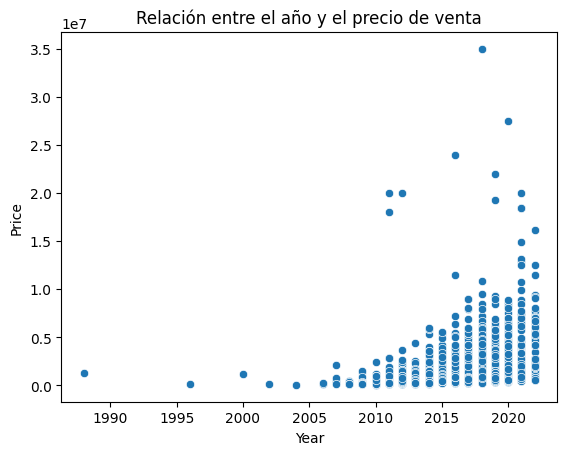

In [35]:
# Mostrar información general del dataset
df.info()
df.describe()

# Verificar los nombres de las columnas
print("Columnas del Dataset:", df.columns)

# Gráficas de distribución para la columna de precio
sns.histplot(df['Price'], bins=30, kde=True)
plt.title('Distribución de los precios de venta')
plt.show()

# Relación entre el año y el precio de venta
sns.scatterplot(x=df['Year'], y=df['Price'])
plt.title('Relación entre el año y el precio de venta')
plt.show()


# 3. Preprocesamiento de Datos

## Limpieza de las columnas 'Engine', 'Max Power' y 'Max Torque':

In [36]:
# Asegurarse de que los valores en 'Engine' sean cadenas antes de reemplazar
df['Engine'] = df['Engine'].astype(str).str.replace(' cc', '').astype(float)

# Limpiar la columna 'Max Power' para extraer solo el valor numérico
df['Max Power'] = df['Max Power'].apply(lambda x: re.findall(r'\d+\.*\d*', str(x))[0] if pd.notnull(x) else np.nan).astype(float)

# Limpiar la columna 'Max Torque' para extraer solo el valor numérico
df['Max Torque'] = df['Max Torque'].apply(lambda x: re.findall(r'\d+\.*\d*', str(x))[0] if pd.notnull(x) else np.nan).astype(float)

# Verificar que las columnas se hayan convertido correctamente
print(df[['Engine', 'Max Power', 'Max Torque']].head())


   Engine  Max Power  Max Torque
0  1198.0       87.0    109.0000
1  1248.0       74.0    190.0000
2  1197.0       79.0    112.7619
3  1197.0       82.0    113.0000
4  2393.0      148.0    343.0000


## Manejo de valores faltantes:

In [37]:
# Separar las columnas numéricas y categóricas
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Imputar valores faltantes en columnas numéricas con la media
numeric_imputer = SimpleImputer(strategy='mean')
df[numeric_columns] = numeric_imputer.fit_transform(df[numeric_columns])

# Imputar valores faltantes en columnas categóricas con la moda
categorical_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_columns] = categorical_imputer.fit_transform(df[categorical_columns])

# Verificar que no haya valores faltantes
print(df.isnull().sum())


Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64


## Codificación de variables categóricas:

In [38]:
# Codificación de variables categóricas
label_encoder = LabelEncoder()
categorical_columns = ['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Owner', 'Seller Type', 'Drivetrain', 'Color']

for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col])

# Verificar que todas las columnas categóricas se hayan convertido correctamente
print(df.head())


   Make  Model      Price    Year  Kilometer  Fuel Type  Transmission  \
0     7    106   505000.0  2017.0    87150.0          6             1   
1    19    802   450000.0  2014.0    75000.0          2             1   
2     8   1030   220000.0  2011.0    67000.0          6             1   
3    30    492   799000.0  2019.0    37500.0          6             1   
4    30    548  1950000.0  2018.0    69000.0          2             1   

   Location  Color  Owner  Seller Type  Engine  Max Power  Max Torque  \
0        56      7      1            1  1198.0       87.0    109.0000   
1        40     15      3            2  1248.0       74.0    190.0000   
2        39      8      1            2  1197.0       79.0    112.7619   
3        41     13      1            2  1197.0       82.0    113.0000   
4        45      7      1            2  2393.0      148.0    343.0000   

   Drivetrain  Length   Width  Height  Seating Capacity  Fuel Tank Capacity  
0           1  3990.0  1680.0  1505.0       

## Estandarización de características numéricas:

In [39]:
# Ajustar la lista de características numéricas
numerical_features = ['Year', 'Kilometer', 'Engine', 'Max Power', 'Max Torque', 'Length', 'Width', 'Height']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Verificar que el preprocesamiento se realizó correctamente
print(df.head())


   Make  Model      Price      Year  Kilometer  Fuel Type  Transmission  \
0     7    106   505000.0  0.170858   0.574133          6             1   
1    19    802   450000.0 -0.721270   0.362268          2             1   
2     8   1030   220000.0 -1.613398   0.222769          6             1   
3    30    492   799000.0  0.765609  -0.291637          6             1   
4    30    548  1950000.0  0.468234   0.257644          2             1   

   Location  Color  Owner  Seller Type    Engine  Max Power  Max Torque  \
0        56      7      1            1 -0.783862  -0.668095   -0.994014   
1        40     15      3            2 -0.704616  -0.871918   -0.405673   
2        39      8      1            2 -0.785447  -0.793525   -0.966690   
3        41     13      1            2 -0.785447  -0.746489   -0.964961   
4        45      7      1            2  1.110116   0.288303    0.705640   

   Drivetrain    Length     Width    Height  Seating Capacity  \
0           1 -0.668002 -0.661029

# 4. Selección de Características
Usa un mapa de calor para ver las correlaciones.

In [25]:
# Seleccionar características y variable objetivo
X = df.drop(['Price'], axis=1, errors='ignore')  # Ajustar según las columnas a eliminar
y = df['Price']

# Selección de características usando SelectKBest
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)

# Visualización de las características seleccionadas
selected_features = X.columns[selector.get_support()]
print("Características seleccionadas:", selected_features)


Características seleccionadas: Index(['Engine', 'Max Power', 'Max Torque', 'Width', 'Fuel Tank Capacity'], dtype='object')



# 5. División del Dataset en Conjuntos de Entrenamiento y Prueba

In [26]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


# 6. Entrenamiento de los Modelos

In [40]:
# Entrenamiento del modelo de Regresión Lineal
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)


LinearRegression()

# 7. Evaluación del Modelo

In [41]:
# Predicción en el conjunto de prueba
y_pred = linear_model.predict(X_test)

# Evaluación de las métricas de desempeño
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE de la Regresión Lineal: {mse:.2f}")
print(f"R2 de la Regresión Lineal: {r2:.2f}")


MSE de la Regresión Lineal: 2217707924717.66
R2 de la Regresión Lineal: 0.68


# 8.Visualización de Resultados

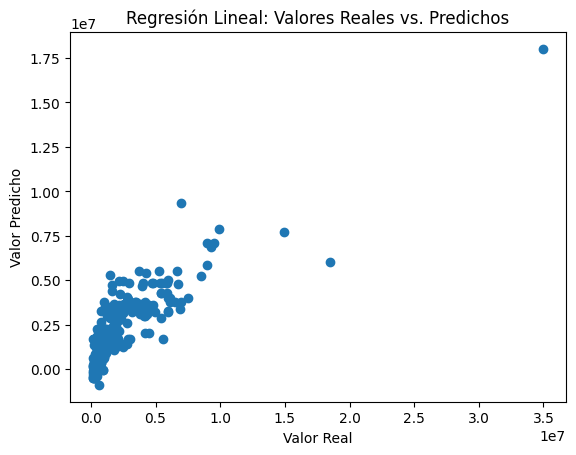

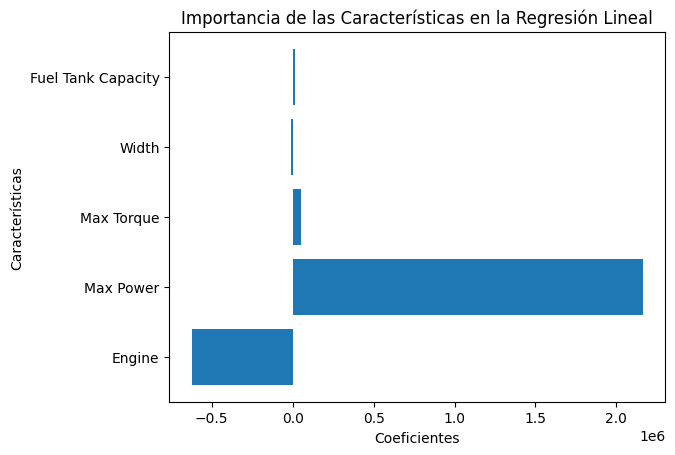

In [42]:
# Gráfico de comparación entre valores reales y predichos para Regresión Lineal
plt.scatter(y_test, y_pred)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predicho')
plt.title('Regresión Lineal: Valores Reales vs. Predichos')
plt.show()

# Importancia de las características seleccionadas
coefs = linear_model.coef_
plt.barh(selected_features, coefs)
plt.title('Importancia de las Características en la Regresión Lineal')
plt.xlabel('Coeficientes')
plt.ylabel('Características')
plt.show()


La gráfica muestra la **importancia de las características** en el modelo de Regresión Lineal para predecir el precio del vehículo. Los coeficientes indican la magnitud y la dirección de la relación entre cada característica y el precio del vehículo.

### Análisis de la Gráfica:
1. **Max Power**: Es la característica más influyente en el modelo, con un coeficiente alto y positivo, lo que sugiere que un aumento en la potencia máxima del vehículo está fuertemente asociado con un incremento en el precio.
2. **Engine**: También tiene un impacto significativo y positivo en el precio, lo que indica que vehículos con motores más grandes tienden a ser más costosos.
3. **Max Torque**: Aunque su coeficiente es menor, sigue contribuyendo de manera positiva al precio del vehículo.
4. **Width** y **Fuel Tank Capacity**: Tienen coeficientes cercanos a cero, lo que indica que estas características tienen una influencia limitada o nula en la predicción del precio en el modelo.

### Conclusión:
El modelo de Regresión Lineal sugiere que la **potencia máxima (Max Power)** y el **tamaño del motor (Engine)** son los factores más relevantes para determinar el precio del vehículo. Estos hallazgos son consistentes con la lógica de que vehículos más potentes y con motores más grandes suelen ser más caros. En cambio, otras características como el ancho del vehículo y la capacidad del tanque de combustible no parecen afectar significativamente el precio en este modelo.

Para mejorar la precisión del modelo, se podrían considerar ajustes en la selección de características o experimentar con modelos más avanzados.
